In [21]:
%pip install  edge-ml

Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install  h5py
%pip install  pandas
%pip install  numpy
from edgeml import DatasetReceiver
import pandas as pd
import numpy as np


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
project=DatasetReceiver("https://app.edge-ml.org","d4a16fbf46d2377a60b8221175f70467")
project.loadData()

In [24]:
import pickle
pickle.dump(project, open("../project.pkl","wb"))

In [25]:
import pickle
project=pickle.load(open("../project.pkl","rb"))

In [26]:
df=pd.concat([d.data for d  in project.datasets])
df.dropna(subset=['Activities'], inplace=True)
df = df[df['Activities'] != '']
df

,time,DeviceMotionAccelX,DeviceMotionAccelY,DeviceMotionAccelZ,DeviceMotionAccelWithGravityX,DeviceMotionAccelWithGravityY,DeviceMotionAccelWithGravityZ,DeviceMotionRotationRateAlpha,DeviceMotionRotationRateBeta,DeviceMotionRotationRateGamma,Activities
13,2024-09-17 10:54:45.479,0.0,0.0,0.0,0.3,0.3,9.8,0.000000,-0.200000,0.0,Still
14,2024-09-17 10:54:45.496,0.0,0.0,0.0,0.3,0.3,9.8,0.100000,0.000000,-0.1,Still
15,2024-09-17 10:54:45.513,0.0,0.0,0.0,0.3,0.3,9.8,0.000000,0.000000,0.0,Still
16,2024-09-17 10:54:45.530,0.0,0.0,0.0,0.2,0.3,9.8,0.000000,0.100000,0.1,Still
17,2024-09-17 10:54:45.547,0.0,0.0,0.0,0.2,0.3,9.8,0.000000,-0.100000,0.0,Still
...,...,...,...,...,...,...,...,...,...,...,...
1076,2024-09-17 10:56:50.619,1.7,1.2,1.2,1.3,-7.3,-3.7,35.799999,40.500000,24.5,Walking
1077,2024-09-17 10:56:50.636,1.7,3.1,0.8,1.3,-5.5,-4.0,35.599998,18.500000,15.7,Walking
1078,2024-09-17 10:56:50.652,1.9,2.9,0.8,1.4,-5.7,-3.9,41.400002,-2.100000,7.2,Walking
1079,2024-09-17 10:56:50.669,1.9,0.4,-0.3,1.5,-8.3,-4.9,39.599998,2.300000,6.2,Walking


In [27]:
labels=df["Activities"].factorize()
labels

(array([0, 0, 0, ..., 2, 2, 2]),
 Index(['Still', 'Usage', 'Walking'], dtype='object'))

In [28]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


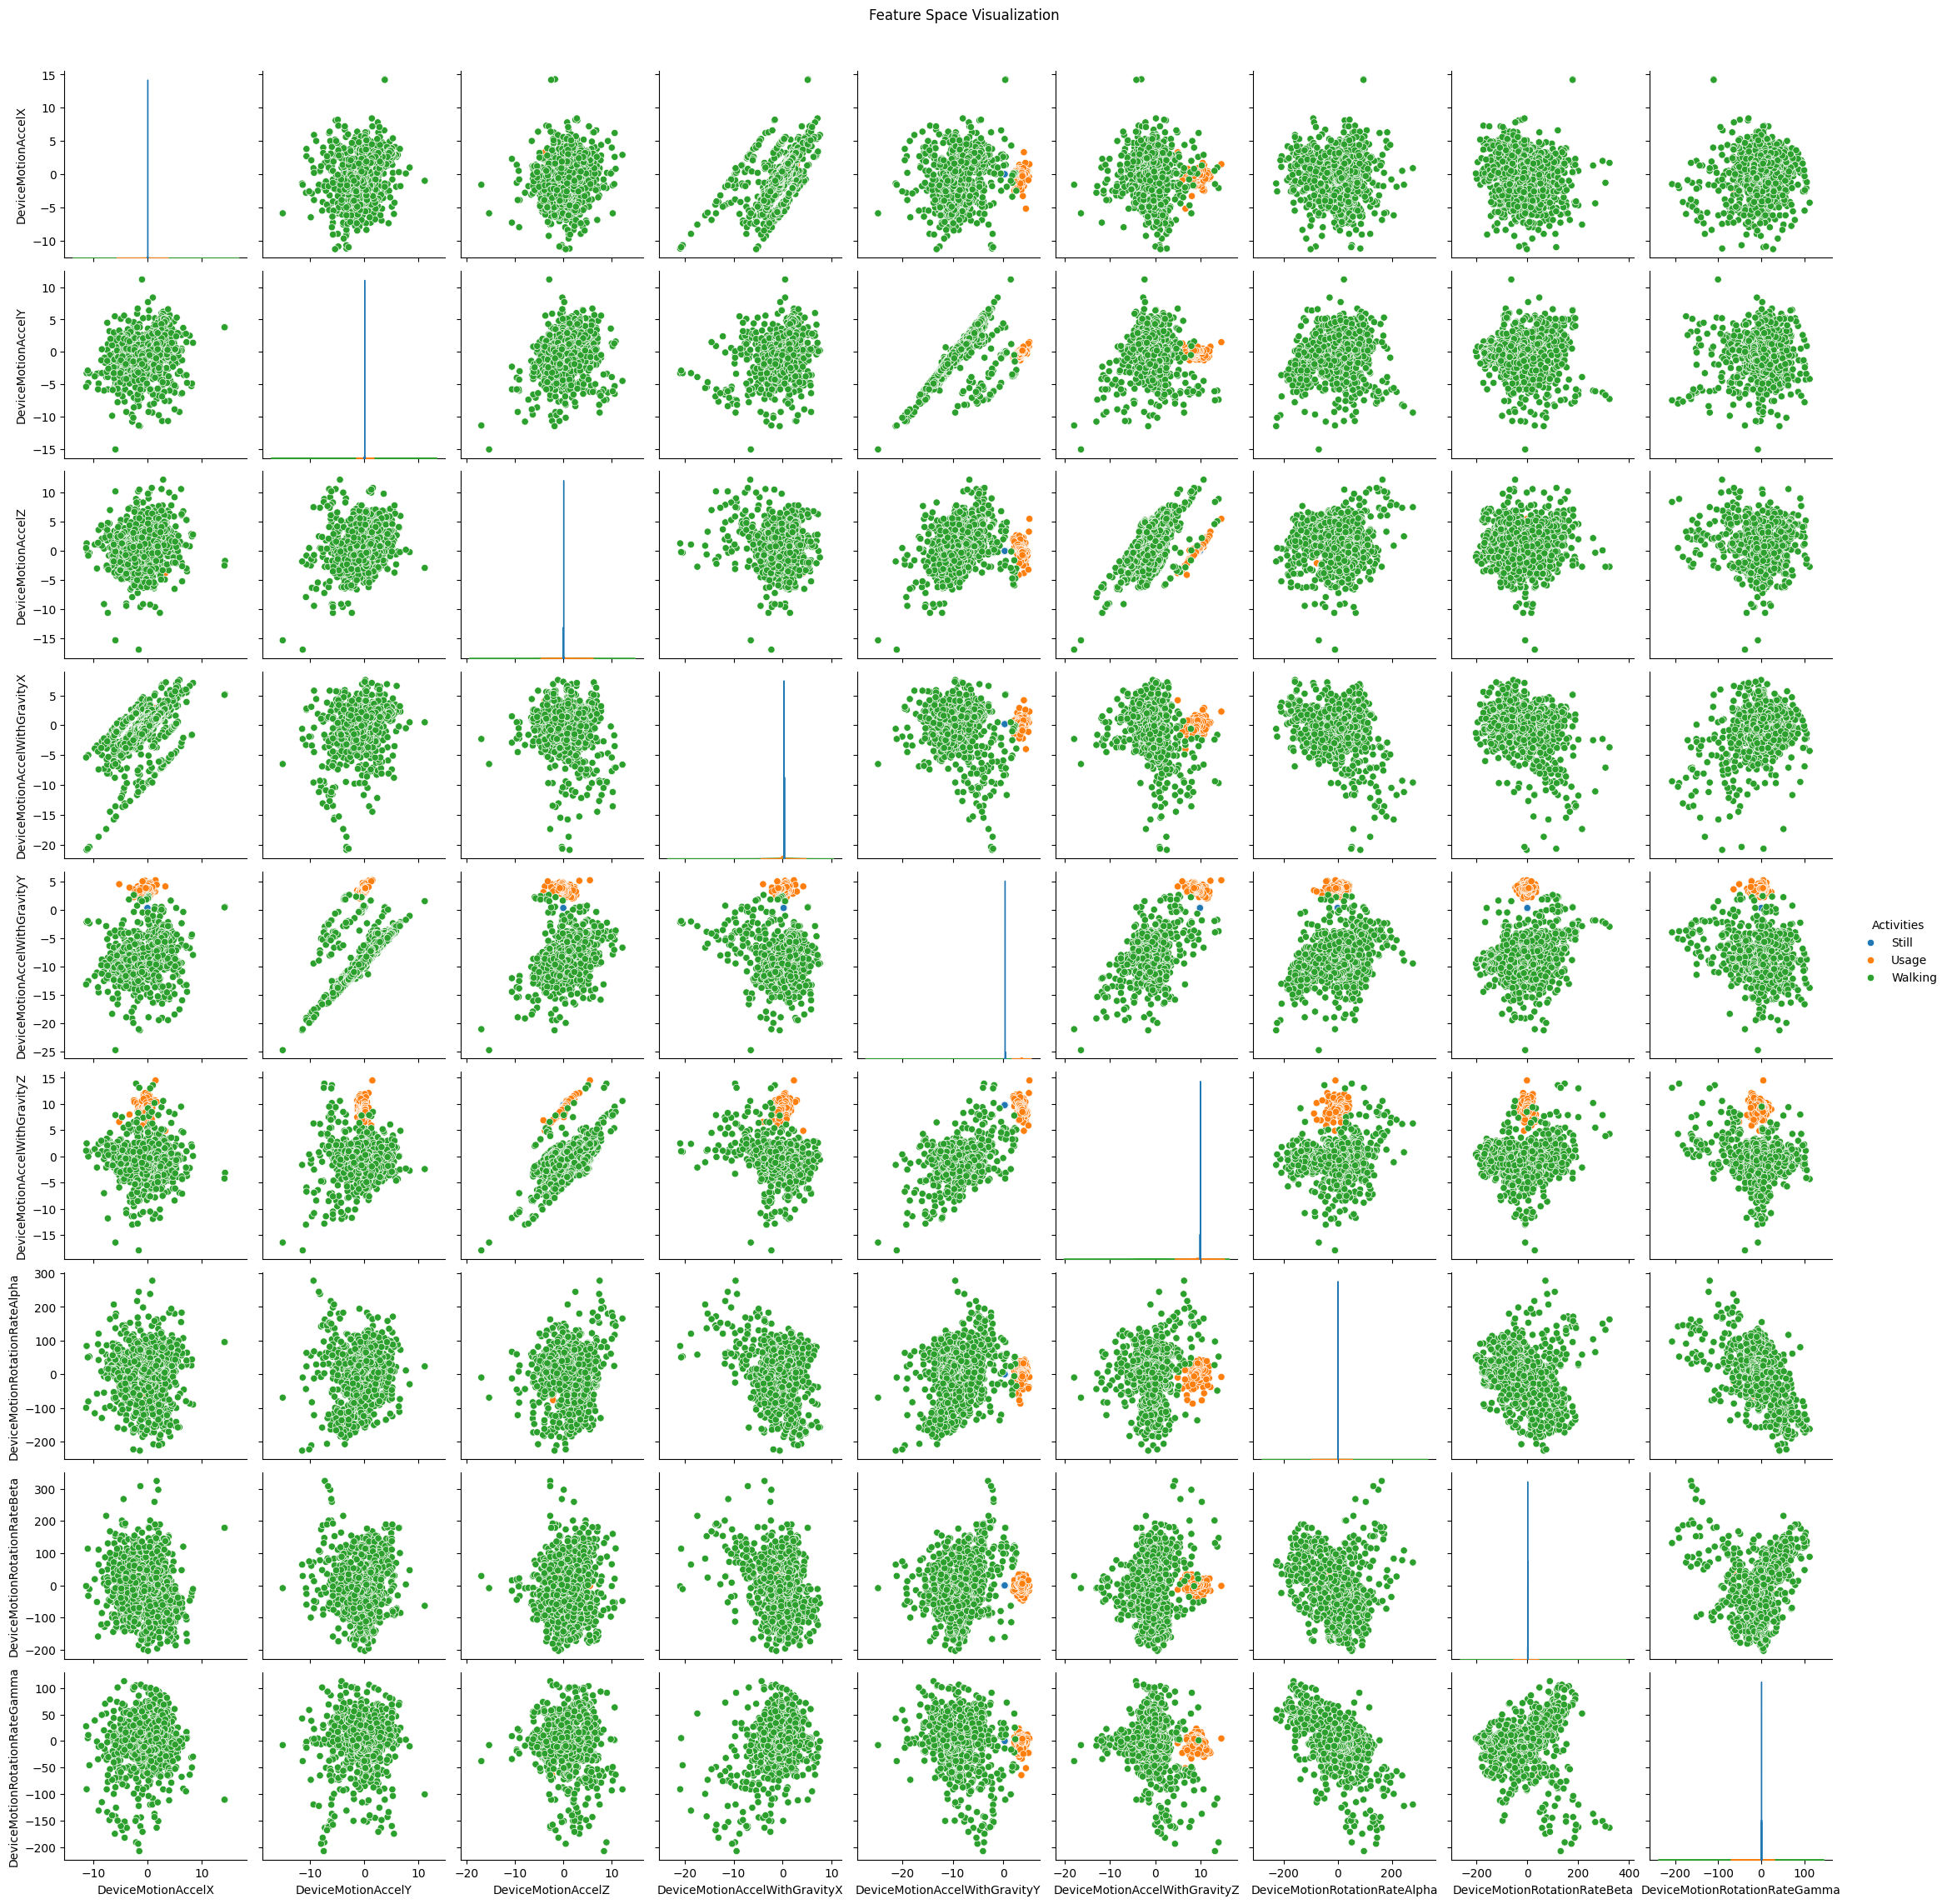

In [29]:
feature_columns = ['DeviceMotionAccelX', 'DeviceMotionAccelY', 'DeviceMotionAccelZ', 'DeviceMotionAccelWithGravityX', 'DeviceMotionAccelWithGravityY', 'DeviceMotionAccelWithGravityZ', 'DeviceMotionRotationRateAlpha', 'DeviceMotionRotationRateBeta', 'DeviceMotionRotationRateGamma']  # Replace with your actual feature column names

df_features = df[feature_columns + ['Activities']]

# Create a pair plot
sns.pairplot(df_features, hue='Activities')
plt.suptitle('Feature Space Visualization', y=1.02)  # Add a title above the plot
plt.show()


In [30]:
# Randomly assign groups
df['group'] = np.random.randint(0, 7, size=len(df))
df

,time,DeviceMotionAccelX,DeviceMotionAccelY,DeviceMotionAccelZ,DeviceMotionAccelWithGravityX,DeviceMotionAccelWithGravityY,DeviceMotionAccelWithGravityZ,DeviceMotionRotationRateAlpha,DeviceMotionRotationRateBeta,DeviceMotionRotationRateGamma,Activities,group
13,2024-09-17 10:54:45.479,0.0,0.0,0.0,0.3,0.3,9.8,0.000000,-0.200000,0.0,Still,3
14,2024-09-17 10:54:45.496,0.0,0.0,0.0,0.3,0.3,9.8,0.100000,0.000000,-0.1,Still,5
15,2024-09-17 10:54:45.513,0.0,0.0,0.0,0.3,0.3,9.8,0.000000,0.000000,0.0,Still,0
16,2024-09-17 10:54:45.530,0.0,0.0,0.0,0.2,0.3,9.8,0.000000,0.100000,0.1,Still,0
17,2024-09-17 10:54:45.547,0.0,0.0,0.0,0.2,0.3,9.8,0.000000,-0.100000,0.0,Still,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2024-09-17 10:56:50.619,1.7,1.2,1.2,1.3,-7.3,-3.7,35.799999,40.500000,24.5,Walking,0
1077,2024-09-17 10:56:50.636,1.7,3.1,0.8,1.3,-5.5,-4.0,35.599998,18.500000,15.7,Walking,3
1078,2024-09-17 10:56:50.652,1.9,2.9,0.8,1.4,-5.7,-3.9,41.400002,-2.100000,7.2,Walking,6
1079,2024-09-17 10:56:50.669,1.9,0.4,-0.3,1.5,-8.3,-4.9,39.599998,2.300000,6.2,Walking,4


In [50]:
%pip install scikit-learn
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut
X = df[feature_columns] 
y = df['Activities']  # Target variable
groups = df['group']
logo = LeaveOneGroupOut()

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
model = RandomForestClassifier(n_estimators=100, random_state=42)
accuracies = []
precisions = []
recalls = []
f1s = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy on Validation Set: {accuracy_score(y_test, y_pred):.2f}')

for train_index, test_index in logo.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    precision = precision_score(y_test, y_pred, average='micro')
    precisions.append(precision)
    recall = recall_score(y_test, y_pred, average='micro')
    recalls.append(recall)
    f1 = f1_score(y_test, y_pred, average='micro')
    f1s.append(f1)
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=10)  # 10-Fold Cross-Validation
    print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean():.2f}')

average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {average_accuracy:.2f}')
average_precision = sum(precisions) / len(precisions)
print(f'Average Precision: {average_precision:.2f}')
average_recall = sum(recalls) / len(recalls)
print(f'Average Recall: {average_recall:.2f}')
average_f1 = sum(f1s) / len(f1s)
print(f'Average F1: {average_f1:.2f}')

Accuracy on Validation Set: 1.00
Cross-Validation Scores: [0.96820809 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Cross-Validation Scores: [0.96820809 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Cross-Validation Scores: [0.96820809 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Cross-Validation Scores: [0.96820809 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Cross-Validation Scores: [0.96820809 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Cross-Validation Scores: [0.96820809 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Cross-Validation Scores: [0.96820809 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Average Cross-Validation Score: 1.00
Average Accuracy: 1.

In [33]:
%pip install sklearn.tree.tree

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.tree.tree (from versions: none)
ERROR: No matching distribution found for sklearn.tree.tree


In [68]:
%pip install skl2onnx onnx
%pip install onnxruntime --upgrade
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

model.fit(X_train, y_train)

# Convert the model to ONNX format
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(model, initial_types=initial_type, target_opset=9)

print("IR version:", onnx_model.ir_version)

# Save the ONNX model
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

with open("model.onnx", "rb") as model_file:
    encoded_model = base64.b64encode(model_file.read()).decode('utf-8')

# Save the base64 string to a JavaScript file or directly embed it in your code
print(f"const modelBase64 = '{encoded_model}';")

with open("model.txt", "w") as g:
    g.write(f"{encoded_model}")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
IR version: 4
const modelBase64 = 'CAQSCHNrbDJvbm54GgYxLjE3LjAiB2FpLm9ubngoADIAOoPMBgrhyQYKC2Zsb2F0X2lucHV0EgVsYWJlbBINcHJvYmFiaWxpdGllcxoWVHJlZUVuc2VtYmxlQ2xhc3NpZmllciIWVHJlZUVuc2VtYmxlQ2xhc3NpZmllcircNgoJY2xhc3NfaWRzQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQABAAUACQ

In [72]:
%pip install scikit-learn==0.23
from sklearn_porter import Porter

# Initialize the porter
porter = Porter(model)

# Export the trained model to JavaScript code
output = porter.export(embed_data=True, language='js')

# Print the generated JavaScript codejip
print(output)

# Optionally, save the output to a file
with open('model.js', 'w') as file:
    file.write(output)

     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
      --------------------------------------- 0.1/7.2 MB 1.3 MB/s eta 0:00:06
     --- ------------------------------------ 0.6/7.2 MB 4.6 MB/s eta 0:00:02
     ------- -------------------------------- 1.4/7.2 MB 7.9 MB/s eta 0:00:01
     ---------- ----------------------------- 1.8/7.2 MB 8.8 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7.2 MB 8.2 MB/s eta 0:00:01
     ---------------- ----------------------- 2.9/7.2 MB 9.8 MB/s eta 0:00:01
     --------------------- ------------------ 3.8/7.2 MB 11.1 MB/s eta 0:00:01
     ------------------------- -------------- 4.5/7.2 MB 11.6 MB/s eta 0:00:01
     ----------------------------- ---------- 5.2/7.2 MB 11.9 MB/s eta 0:00:01
     -------------------------------- ------- 5.8/7.2 MB 11.6 MB/s eta 0:00:01
     -------------------------------------- - 6.9/7.2 MB 12.6 MB/s eta 0:0

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [167 lines of output]
      Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
           ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
           ---------------------------------------- 0.0/6.4 MB 1.4 MB/s eta 0:00:05
           - -------------------------------------- 0.3/6.4 MB 3.5 MB/s eta 0:00:02
           --- ---------

TypeError: module() takes at most 2 arguments (3 given)

In [74]:
%pip install m2cgen
import m2cgen as m2c

# Convert the model to JavaScript code
js_code = m2c.export_to_javascript(model)

# Save the JavaScript code to a file
with open("random_forest_model.js", "w") as f:
    f.write(js_code)

Note: you may need to restart the kernel to use updated packages.
